In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labeled_dataset_path = '/content/drive/My Drive/BDC_SatriaData_2024/dataset/dataset_penyisihan_bdc_2024.xlsx'

labeled_df = pd.read_excel(labeled_dataset_path)

In [ ]:
# fixing bad unicode
!pip install ftfy
import ftfy
labeled_df['text'] = labeled_df['text'].apply(lambda x: ftfy.fix_text(x))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
import re

In [ ]:
# get the hastag
def get_hashtags(text):
    hashtags = re.findall(r"#([^ ]+)", text)
    return hashtags

In [ ]:
labeled_df['hashtags'] = labeled_df['text'].apply(get_hashtags)

print(labeled_df.head(5))

                                                text             label  \
0  Kunjungan Prabowo ini untuk meresmikan dan men...  Sumber Daya Alam   
1  RT Anies dapat tepuk tangan meriah saat jadi R...           Politik   
2  @CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...         Demografi   
3  RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...           Politik   
4  Anies Baswedan Harap ASN termasuk TNI dan Polr...           Politik   

                                            hashtags  
0  [IndonesiaSentris, IndonesiaHijau, 02Melanjutk...  
1                            [AminMiskinkanKoruptor]  
2                                                 []  
3                                                 []  
4                                                 []  


In [ ]:
# get list the labels
labels = labeled_df['label'].unique()

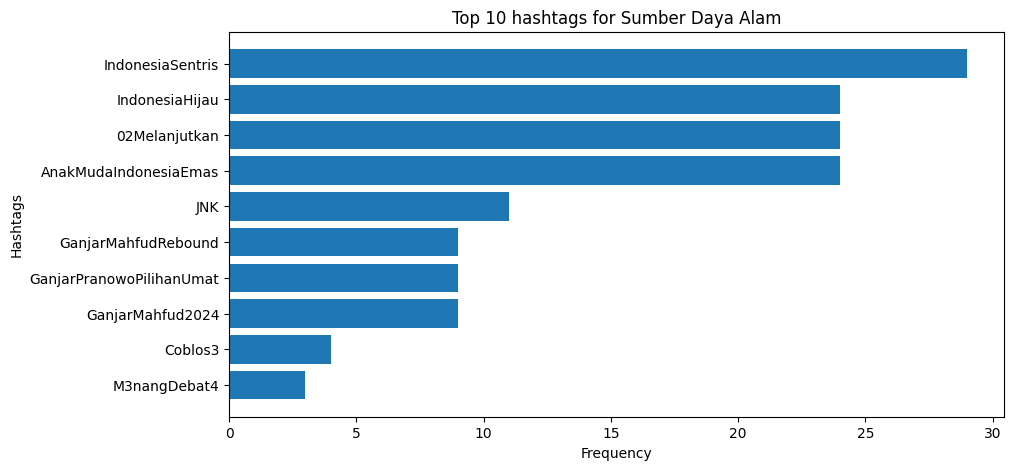

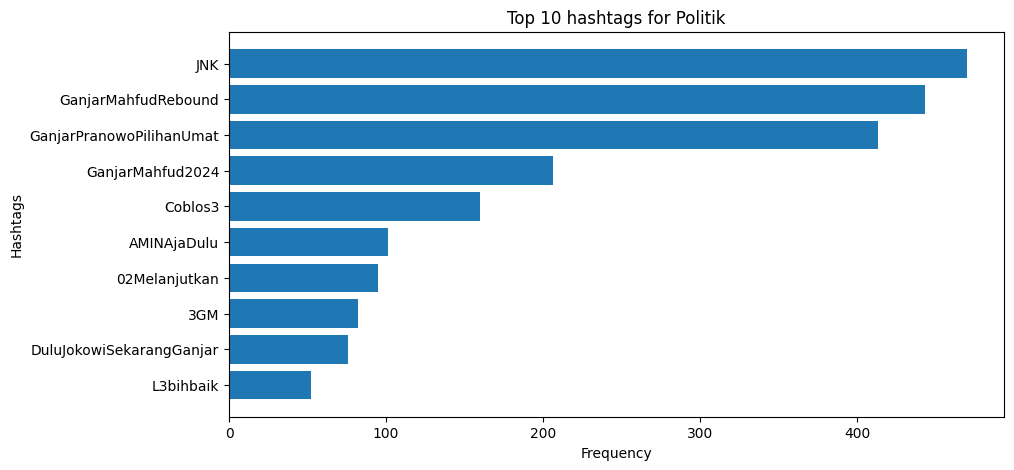

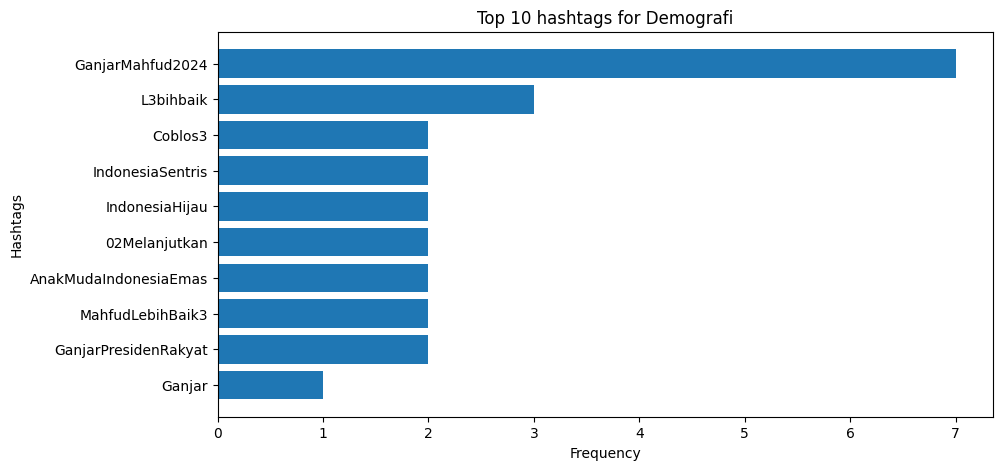

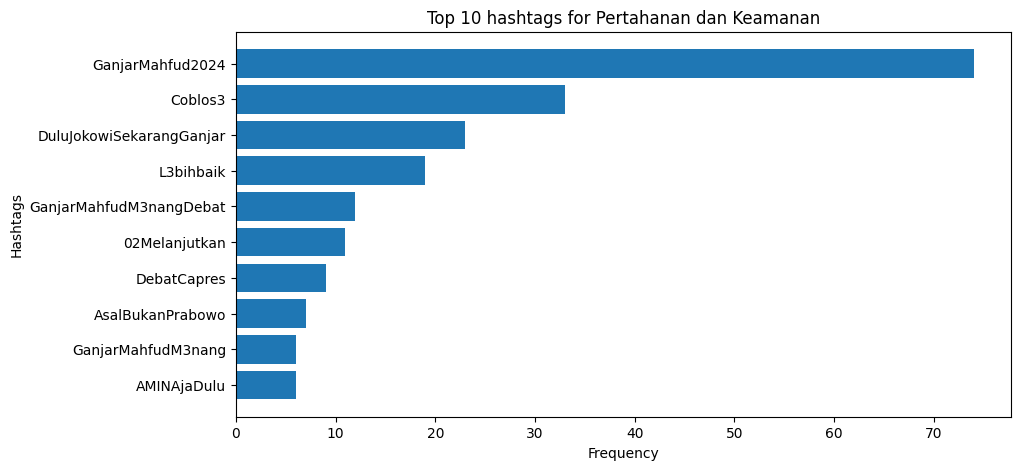

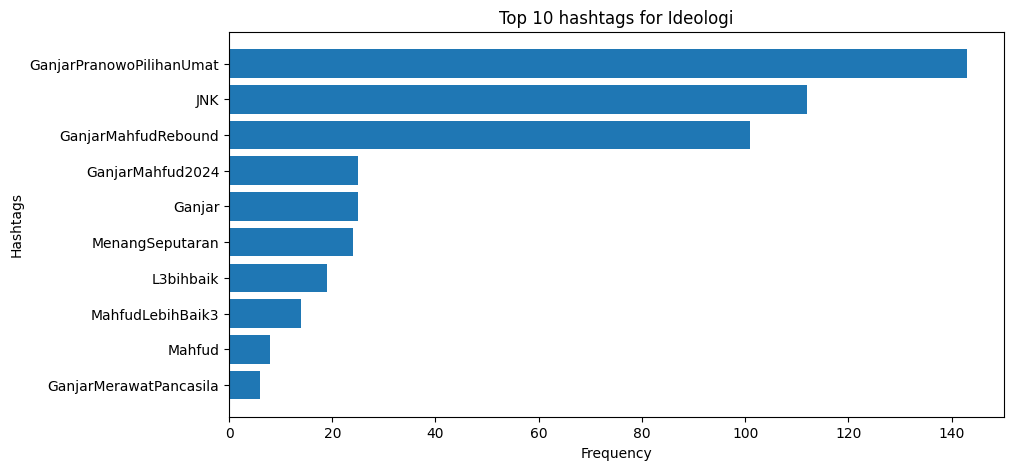

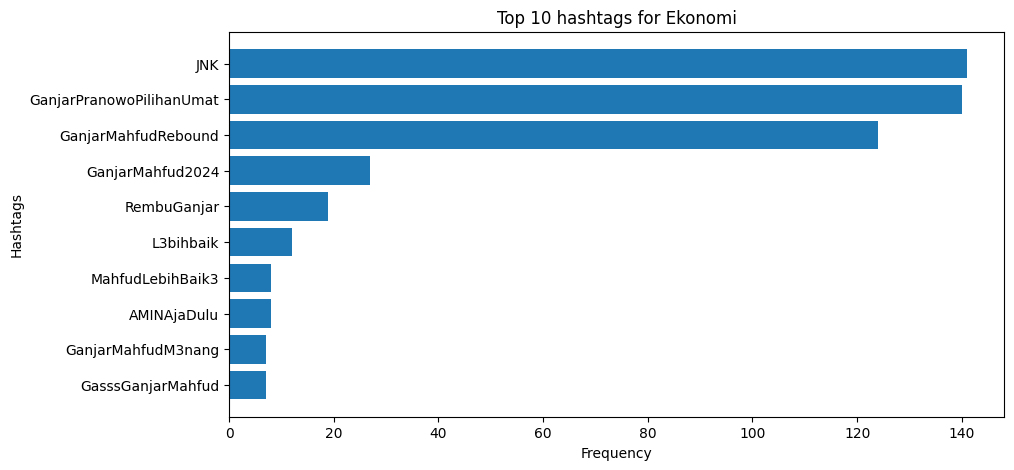

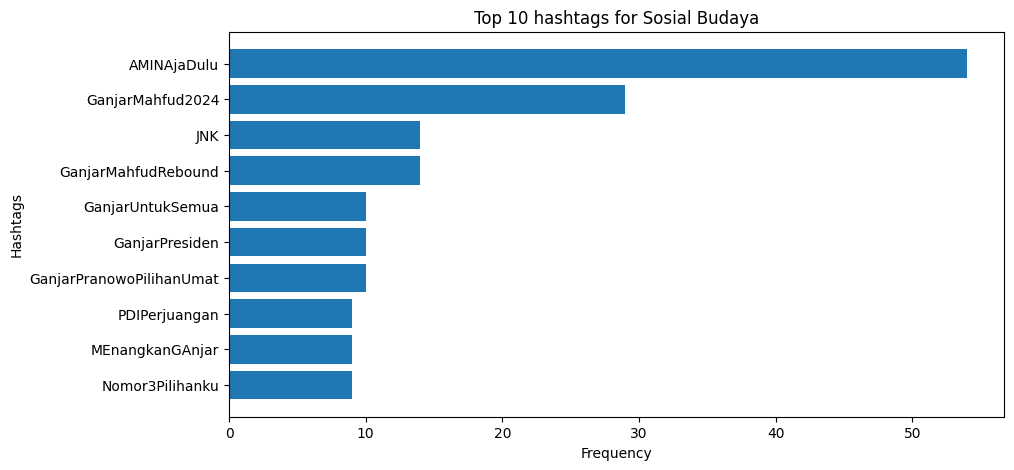

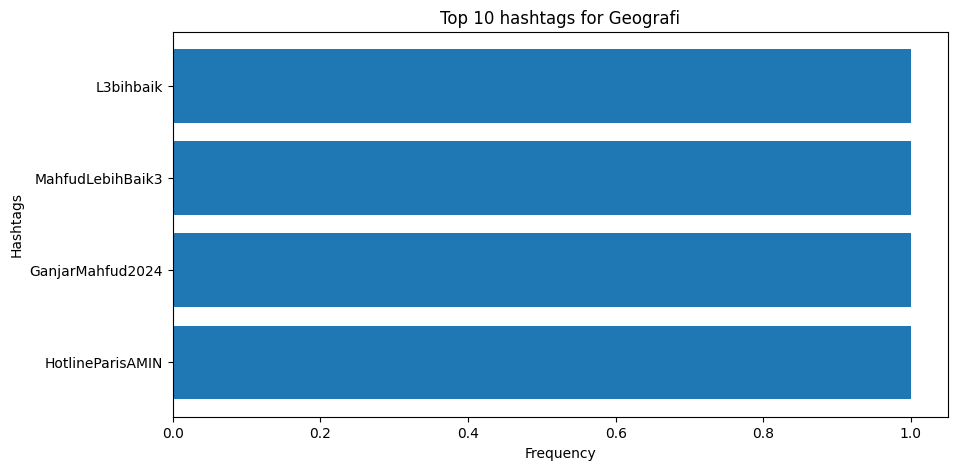

In [ ]:
# visualize distribution of hashtags grouped by the label
import matplotlib.pyplot as plt

# get the frequency of hashtags
hashtags_freq = {}
for label in labels:
    hashtags_freq[label] = {}

for index, row in labeled_df.iterrows():
    for hashtag in row['hashtags']:
        for label in labels:
            if label in row['label']:
                if hashtag in hashtags_freq[label]:
                    hashtags_freq[label][hashtag] += 1
                else:
                    hashtags_freq[label][hashtag] = 1

# sort the hashtags by frequency
for label in labels:
    hashtags_freq[label] = dict(sorted(hashtags_freq[label].items(), key=lambda item: item[1], reverse=True))

# plot the hashtags horizontally for top 10 hashtags
for label in labels:
    plt.figure(figsize=(10, 5))
    plt.barh(list(hashtags_freq[label].keys())[:10][::-1], list(hashtags_freq[label].values())[:10][::-1])
    plt.xlabel('Frequency')
    plt.ylabel('Hashtags')
    plt.title(f'Top 10 hashtags for {label}')
    plt.show()